In [1]:
import os
import numpy as np
import pickle
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras import Input
from keras.layers import Flatten, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
from keras.layers import Dense, BatchNormalization, GlobalMaxPooling2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def save_dump(file_path, data, labels):
    file = open(file_path, 'wb')
    # dump information to that file
    pickle.dump((data, labels), file)
    # close the file
    file.close()
    pass


def load_data(path_file):
    file = open(path_file, 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    print(pixels.shape)
    print(labels.shape)
    return pixels, labels


def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    # plt.savefig('roc.png')


def plot_model_legend(model_history):
    # view
    accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation')
    plt.xlim(0, len(accuracy))
    plt.ylim(0, 1)
    plt.legend(loc='best')
    plt.show()
    

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True, fmt='g')
    print(cmx_data)
    plt.show()


# def print_ratio(y_true, y_pred):
#     labels = sorted(list(set(y_true)))
#     cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
#     cmx_ratio = [[cmx_data[0][0]/(cmx_data[0][0] + cmx_data[0][1]), cmx_data[0][1]/(cmx_data[0][0] + cmx_data[0][1])],
#                  [cmx_data[1][0]/(cmx_data[1][0] + cmx_data[1][1]), cmx_data[1][1]/(cmx_data[1][0] + cmx_data[1][1])] ]
#     df_cmx = pd.DataFrame(cmx_ratio, index=labels, columns=labels)
#     plt.figure(figsize = (10,7))
#     sn.heatmap(df_cmx, annot=True)
#     print(cmx_ratio)
#     plt.show()

In [4]:
data_train_1, labels_train_1 = load_data("/content/drive/MyDrive/data_train_1.data")
data_train_2, labels_train_2 = load_data("/content/drive/MyDrive/data_train_2.data")
# data_train_3, labels_train_3 = load_data("/home/quangdm/rnd/data/text/data_train_3.data")
# data_train_4, labels_train_4 = load_data("/home/quangdm/rnd/data/text/data_train_4.data")
# data_test, labels_test = load_data("/home/quangdm/rnd/data/text/data_test.data")

(2100, 768, 100, 1)
(2100,)
(2100, 768, 100, 1)
(2100,)


In [5]:
global_dataset = np.concatenate((data_train_1, data_train_2), axis=0)
global_labels = np.concatenate((labels_train_1, labels_train_2), axis=None)

# global_dataset = data_train_1
# global_labels = labels_train_1

lb = LabelBinarizer()
global_labels = lb.fit_transform(global_labels)

global_dataset.shape, global_labels.shape

((4200, 768, 100, 1), (4200, 6))

In [6]:
class_number = len(global_labels[0])
ip_shape = global_dataset[0].shape

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), input_shape=(ip_shape), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_number, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 768, 100, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 384, 50, 128)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 384, 50, 64)       204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 192, 25, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 192, 25, 32)       51232     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 96, 12, 32)       0

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(global_dataset, global_labels, test_size=0.2, 
                                                                    random_state=100, shuffle=True, stratify=global_labels)


train_data, valid_data, train_labels, valid_labels = train_test_split(data_train, labels_train, test_size=0.2, 
                                                                      random_state=100, shuffle=True, stratify=labels_train)

data_train.shape, data_test.shape, labels_train.shape, labels_test.shape, train_data.shape, valid_data.shape, train_labels.shape, valid_labels.shape

In [ ]:
weights_init = model.get_weights()
model.set_weights(weights_init)
model_history = model.fit(train_data, train_labels, epochs=50, batch_size=16, verbose='auto', 
                          validation_data=(valid_data, valid_labels), shuffle=True)

In [ ]:
test_eval = model.evaluate(data_test, labels_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

27/27 [==============================] - 2s 82ms/step - loss: 0.9522 - accuracy: 0.8310
Test loss: 0.9521843194961548
Test accuracy: 0.8309524059295654


In [ ]:
plot_model_history(model_history)
plot_model_legend(model_history)

In [ ]:
y_test = np.argmax(labels_test, axis=1)
labels_test, y_test

Accuracy: 83.10 %
              precision    recall  f1-score   support

     Class 0       0.70      0.73      0.72       140
     Class 1       0.92      0.82      0.87       140
     Class 2       0.84      0.81      0.82       140
     Class 3       0.81      0.93      0.87       140
     Class 4       0.87      0.87      0.87       140
     Class 5       0.86      0.83      0.84       140

    accuracy                           0.83       840
   macro avg       0.83      0.83      0.83       840
weighted avg       0.83      0.83      0.83       840

[[102   5   2  14  16   1]
 [ 11 115   4   2   1   7]
 [  7   3 113   6   0  11]
 [  8   1   0 130   1   0]
 [ 11   0   0   7 122   0]
 [  6   1  15   1   1 116]]


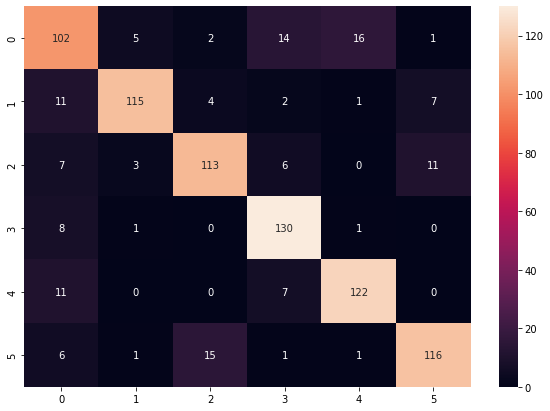

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report, auc

y_predict = model.predict(data_test)
y_target = np.argmax(y_predict, axis=1)
y_test = np.argmax(labels_test, axis=1)
print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_target)))

target_names = ["Class {}".format(i) for i in range(class_number)]
print(classification_report(y_test, y_target, target_names=target_names))

print_cmx(y_test, y_target)
# print_ratio(y_test, y_target)

In [7]:
# training ROC

global_labels_not_one_hot = np.argmax(global_labels, axis=1)
global_dataset.shape, global_labels_not_one_hot

((4200, 768, 100, 1), array([0, 0, 0, ..., 5, 5, 5]))

In [8]:
X = global_dataset
y = global_labels_not_one_hot

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
for train, test in kfold.split(X, y):
    print(type(X[train]))
    print(X[train].shape)
    print(type(y[test]))
    print(y[test].shape)

<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)
<class 'numpy.ndarray'>
(3780, 768, 100, 1)
<class 'numpy.ndarray'>
(420,)


In [9]:
fold_dict={}
fold_dict['y_test']=y[test]

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
weights_init = model.get_weights()
pred_folds_list=[]

cvscores = []
for train, test in kfold.split(X, y):
    fold_dict=dict()

    y_train_one_hot = tf.keras.utils.to_categorical(y[train], num_classes=class_number)
    y_test_one_hot = tf.keras.utils.to_categorical(y[test], num_classes=class_number)

    model.set_weights(weights_init)
    model.fit(X[train], y_train_one_hot, epochs=50, batch_size=16, verbose='auto', shuffle=True)
    # evaluate the model
    scores = model.evaluate(X[test], y_test_one_hot, verbose='auto')
    
    fold_dict['y_test']=y_test_one_hot
    fold_dict['y_pred']=model.predict(X[test])
    pred_folds_list.append(fold_dict)
    
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Epoch 1/50
237/237 [==============================] - 34s 86ms/step - loss: 1.5730 - accuracy: 0.3556
Epoch 2/50
237/237 [==============================] - 20s 83ms/step - loss: 0.8458 - accuracy: 0.6937
Epoch 3/50
237/237 [==============================] - 20s 84ms/step - loss: 0.6846 - accuracy: 0.7548
Epoch 4/50
237/237 [==============================] - 20s 85ms/step - loss: 0.5719 - accuracy: 0.7950
Epoch 5/50
237/237 [==============================] - 20s 84ms/step - loss: 0.4970 - accuracy: 0.8156
Epoch 6/50
237/237 [==============================] - 20s 84ms/step - loss: 0.4531 - accuracy: 0.8333
Epoch 7/50
237/237 [==============================] - 20s 84ms/step - loss: 0.4260 - accuracy: 0.8444
Epoch 8/50
237/237 [==============================] - 20s 84ms/step - loss: 0.3748 - accuracy: 0.8616
Epoch 9/50
237/237 [==============================] - 20s 84ms/step - loss: 0.3446 - accuracy: 0.8688
Epoch 10/50
237/237 [==============================] - 20s 85ms/step - loss: 0.343

In [ ]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

i = 1
avg_score = []
for idx, item in enumerate(pred_folds_list):
    y_test = item['y_test']
    y_pred = item['y_pred']

    y_test_classer = np.argmax(y_test, axis=1)
    score = roc_auc_score(y_test_classer, y_pred, multi_class='ovr')
    avg_score.append(score)
    print("ROC", i ,": %.4f" % score)
    i += 1
print("AVG ROC = %.4f" % np.average(avg_score))

In [ ]:
# from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
# fpr_list=[]
# tpr_list=[]
# auc_list=[]
# i = 1
# for idx,item in enumerate(pred_folds_list):
#     # print(np.array(item['y_pred']).shape)
#     # fpr, tpr, thresholds = roc_curve(item['y_test'], item['y_pred'])

#     y_test = item['y_test']
#     y_pred = item['y_pred']

#     y_test_classer = np.argmax(y_test, axis=1)
#     fpr, tpr, thresholds = roc_auc_score(y_test_classer, y_pred)

#     fpr_list.append(fpr)
#     tpr_list.append(tpr)

#     # plt.plot(fpr, tpr, linestyle='--')
#     auc_keras = auc(fpr, tpr)
#     auc_list.append(auc_keras)
#     plt.plot(fpr, tpr, linestyle='--', label='ROC %d (auc = %0.3f)' % (i, auc_keras))
#     i += 1

# plt.legend(loc="lower right")
# plt.show()

In [ ]:
model.save('/content/drive/MyDrive/cnn_nlp_text_classification_6_classer.h5', save_format='h5')